# Deep Learning Model Training

This is a simple Deep Learning Model Training Sample using Keras High Level API.

Keras is a high-level neural networks API, written in Python which contains a set of helper methods and libraries to define neural networks. 

Keras also comes with a access to some certain set of open data set for training purposes and Keras also provides some utility methods for pre-processing training data. 

Keras is self is a high level API so it needs a backend, it can work on Tensorflow, CNTK and Theano.

In following example, we will go over training a model with famous MNIST (hand-written digits) data set to create a DL model which can predict hand written digits. 

- Good visual ilustration of the model we will build
http://scs.ryerson.ca/~aharley/vis/conv/

First, we start importing required libraries to start with. 

## MNIST Database - Handwritten digits (0-9)

On this tutorial we will use Python* to implement one Convolutional Neural Network - a simplified version of LeNet - that will recognized Handwritten digits. A project like this one, using the MNIST dataset is considered as the "Hello World" of Machine Learning.

We will use Keras*, TensorFlow* and the MNIST database.

According to the description on their website, "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research."*

We will use TensorFlow as the backend for Keras. TensorFlow is an open source software library for high performance numerical computation.

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST database is also available as a Keras dataset, with 60k 28x28 images of the 10 digits along with a test set of 10k images, so it is very easy to import and use it on our code.

One good visual and interactive reference on what we are developing can be found here. The basic difference between our code and this interactive sample is the number and size of convolutional and fully-connected layers (LeNet uses two of each, we will use a single one, to reduce training time). We also adjusted the layers size to balance between accuracy and training time. We are achieving 98,54% of accuracy with less than 2 minutes training time on an Intel® Core™ processor.

This code can also be optimized by several ways to increase accuracy, and we would like to invite you to explore this later, changing the number of epochs, filters, fully-connected neurons and also including additional convolutional and fully connected layers. You can also use flattening, dropout and batch normalization layers. Other optimization techniques can also be applied, so feel free to use this tutorial code as a base to explore those optimization techniques.

In a nutshell, the convolutional and pooling layers are responsible for extracting a set of features from the input images, and the fully-connected layers are responsible for classification.

Convolutional layers applies a set of filters to the input image to extract important features from the image. The filters are small matrixes also called image kernels that can be repeatedly applied to the input image ("sliding" the filter on the image). You may already used those filters on traditional image processing applications such as GIMP (i.e. blurring, sharpening or embossing). This article gives a good overview on image kernels with some live experiments. Each filter will generate a new image that will be the input for the next layer, typically a pooling layer.

Pooling layers reduces the spatial size of the image (downsampling), reducing the computation in the network and also controlling overfitting.

Fully connected layers are traditional Neural Network layers.

### NOTE: Install Following Packages for Python

```
tensorflow
keras
```

Install Commands

```
pip3 install tensorflow
pip3 install keras
```

In [1]:
# Sequential Network Model https://keras.io/models/sequential/
from keras.models import Sequential
# Core Layers https://keras.io/layers/core/
# Dense: densely-connected NN layer, to be used as classification layer
# Flatten: layer to flatten the convolutional layers

from keras.layers import Dense, Flatten
# Convolutional Layers https://keras.io/layers/convolutional/
# Conv2D: 2D convolution Layer
from keras.layers import Conv2D

# Pooling Layer: https://keras.io/layers/pooling/
# MaxPooling2D: Max pooling operation for spatial data
from keras.layers import MaxPooling2D

# Utilities https://keras.io/utils/
from keras.utils import np_utils

# MNIST Dataset https://keras.io/datasets/
# Dataset of 60,000 28x28 handwritten images of the 10 digits, along with a test set of 10,000 images.
from keras.datasets import mnist

## Keras Backend
from keras import backend as K

## Util lib os
import os, argparse
import tensorflow as tf

# The original freeze_graph function
from tensorflow.python.tools.freeze_graph import freeze_graph

Using TensorFlow backend.


## Download MNIST Dataset and Prepare Data for Training

At this stage, we will first load the dataset. using mnist interface. Then, we go with pre-processing data set to make it ready to be accepted in Input layer for DL.

Then, we make sure type is float, DL models only uses floating point values.

In [2]:
# Load MNIST data set in two sets: Trainning (60K IMAGES) and Testing (10k images)
(train_dataset, train_classes),(test_dataset, test_classes) = mnist.load_data()

# Adjust datasets to TensorFlow
# Reduce image channels from 3 to 1
train_dataset = train_dataset.reshape(train_dataset.shape[0], 28, 28, 1)
test_dataset = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

# Covert data from int8 to float32
train_dataset = train_dataset.astype('float32')
test_dataset = test_dataset.astype('float32')

Here, we are doing normalization of the dataset. DL models, can work on normalized data a lot faster and accurate. heterogenous numbers tend to over-fit and hard to converge during training process. 

In [3]:
# Normalize data to speed up processing time
train_dataset = train_dataset / 255
test_dataset = test_dataset / 255

At this part, we convert output to a categorical class representation. During the training process, our model will try to converge certain values, mainly 0 or 1. However in this case we have 10 different category. Therefore, we create a tensor with 1D shape where training value only can be one of the values.

- e.g. label of training input is 2.
- DL output/class is [0., 0., 1., ....]

In [4]:
# Convert class data from numerical to categorical
train_classes = np_utils.to_categorical(train_classes, 10)
test_classes = np_utils.to_categorical(test_classes, 10)

## Create Keras CNN Model

Here is the final part where we create a basic Convolutional Neural Network with using Keras Layers. 

Below is a very basic CNN.

In [5]:
# Create the Convolutional Neural Network
cnn = Sequential()

# Add the convolutional layer with 32 filters, 3x3 convolution window,
# 28 x 28 x 1 pixels imput array and Rectified Linear Unit activation function
cnn.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))

# Add one Pooling layer with default 2x2 size
cnn.add(MaxPooling2D())

# Add one flattening layer to convert the output matrix to a vector to be the Deep Neural Network input
cnn.add(Flatten())

# Add one hidden layer with 128 neurons and Rectified Linear Unit activation function
cnn.add(Dense(units = 128, activation = 'relu'))

# Add the output layer with 10 neurons (one for each class) with Softmax as the activation function
cnn.add(Dense(units = 10, activation = 'softmax'))

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


Here is the last part, where loss function, optimizer and metrics has been defined for training process. 

`.fit` method used to start training process with provided training and label data.

When, fit finished your model is ready to predict. 

`.evaluate` used to check results with test data set and see the accuracy of your model with a data set never seen.

## Compile Model to Make it Ready for Training

In [6]:
# Compile the CNN with:
#  - Categorical crossentropy as the loss function
#  - Adam optimizer
#  - Accuracy as the results evaluation metric
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Train Model

In [7]:
# Execute the training on 5 epochs, validating the generated model with test dataset on each epoch
cnn.fit(train_dataset, train_classes, batch_size = 256, epochs = 4, validation_data = (test_dataset, test_classes))

# Extract and print the Accuracy results
result = cnn.evaluate(test_dataset, test_classes)
print ('Accuracy = ' + str(result[1] * 100) + "%")

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 25s 425us/step - loss: 0.2959 - acc: 0.9181 - val_loss: 0.1175 - val_acc: 0.9657
Epoch 2/4
60000/60000 [==============================] - 25s 421us/step - loss: 0.0934 - acc: 0.9734 - val_loss: 0.0747 - val_acc: 0.9768
Epoch 3/4
60000/60000 [==============================] - 25s 422us/step - loss: 0.0616 - acc: 0.9818 - val_loss: 0.0560 - val_acc: 0.9819
Epoch 4/4
10000/10000 [==============================] - 2s 162us/step
Accuracy = 98.27%


# Froze & Save Model

In [8]:
import tensorflow as tf
from tensorflow.python.framework import graph_io

cnn.save('./models/digit_recognizer.h5')

# Froze Model

In [9]:
K.set_learning_phase(0)

In [10]:
from keras.models import load_model
model = load_model('./models/digit_recognizer.h5')
print(model.outputs)
print(model.inputs)

[<tf.Tensor 'dense_2_1/Softmax:0' shape=(?, 10) dtype=float32>]
[<tf.Tensor 'conv2d_1_input_1:0' shape=(?, 28, 28, 1) dtype=float32>]


In [11]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

In [12]:
frozen_graph = freeze_session(K.get_session(), output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 58 variables.
INFO:tensorflow:Converted 58 variables to const ops.


In [13]:
# Save to ./model/tf_model.pb
tf.train.write_graph(frozen_graph, "models", "digit_recognizer.pb", as_text=False)

'models/digit_recognizer.pb'

# Load and Predict with Saved Model

In [14]:
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo_tf.py \
--input_model 'models/digit_recognizer.pb' \
--input_shape [1,28,28,1] \
--output_dir 'models/FP32'

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/Workshop/models/digit_recognizer.pb
	- Path for generated IR: 	/home/intel/Workshop/models/FP32
	- IR output name: 	digit_recognizer
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,28,28,1]
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to model dump for TensorBoard: 	None
	- List of shared libraries with TensorFlow custom layers implementation: 	None
	- Update the configuration file with input/output node names: 	None
	- Use configu

# Prepare Model for Intel(R) Distribution of OpenVINO(TM) Toolkit Inference

Model Shape:  [1, 1, 28, 28]
Frame Shape:  (59, 57)
In Frame Shape:  (1, 28, 28)
Result Vector:  [[4.51112550e-11 1.30003126e-12 3.50218897e-07 8.21897328e-01
  8.68001417e-14 1.78076923e-01 1.01418614e-07 5.44159093e-11
  2.51088441e-05 1.98381201e-07]]
Digit - 0  - Possibility 0.0
Digit - 1  - Possibility 0.0
Digit - 2  - Possibility 0.0
Digit - 3  - Possibility 0.8219
Digit - 4  - Possibility 0.0
Digit - 5  - Possibility 0.17808
Digit - 6  - Possibility 0.0
Digit - 7  - Possibility 0.0
Digit - 8  - Possibility 3e-05
Digit - 9  - Possibility 0.0


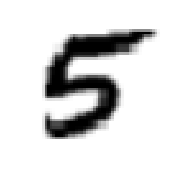

Inference Time:  0.00152  Seconds


In [19]:
# Press (SHIFT + Enter or Click on Run Button)
# Required Libraries Imported
import sys
import os
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Import Required OpenVINO(TM) Libraries
from openvino.inference_engine import IEPlugin, IENetwork

def createPlugin(target_device, extension_list):
    # Plugin initialization for specified device. We will be targeting CPU initially.
    plugin = IEPlugin(device=target_device)

    # Loading additional kernel extension libraries for the CPU
    if target_device == 'CPU':
        for extension in extension_list:
            plugin.add_cpu_extension('/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so')

    return plugin


# Press (SHIFT + Enter or Click on Run Button)
def createNetwork(model_xml, model_bin, plugin):
    
    # Importing network weights from IR models.
    net = IENetwork(model=model_xml, weights=model_bin)

    # Some layers in IR models may be unsupported by some plugins so we check if there any unsupported layers
    if "CPU" in plugin.device:
        supported_layers = plugin.get_supported_layers(net)
        not_supported_layers = [l for l in net.layers.keys() if l not in supported_layers]
        if len(not_supported_layers) != 0:
            print("Following layers are not supported by the plugin for specified device {}:\n {}".
                      format(plugin.device, ', '.join(not_supported_layers)))
            return None
    return net

# Press (SHIFT + Enter or Click on Run Button)
def loadNetwork(plugin, net):
    # Loading IR model to the plugin.
    exec_net = plugin.load(network=net, num_requests=2)
    
    # Getting the input and outputs of the network
    input_blob = next(iter(net.inputs))
    
    out_blob = next(iter(net.outputs))
    
    return exec_net,input_blob,out_blob

# Press (SHIFT + Enter or Click on Run Button)
def preprocessImage(img_path, net, input_blob):
    # Reading the frame from a jpeg file
    frame = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    
    # Reshaping data
    n, c, h, w = net.inputs[input_blob].shape
    print('Model Shape: ', net.inputs[input_blob].shape)
    print('Frame Shape: ', frame.shape)
    in_frame = cv.resize(frame, (w, h))
    in_frame = in_frame.reshape((1, w, h))
    print('In Frame Shape: ', in_frame.shape)
    # in_frame = in_frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    in_frame = in_frame / 255
    
    return in_frame.reshape((n, c, h, w)),frame

device="CPU" 
model_xml='models/FP32/digit_recognizer.xml'
model_bin='models/FP32/digit_recognizer.bin'
image_file='images/hand_written_digit.png'

# Get Plugin
plugin = createPlugin(target_device=device, 
                      extension_list=['/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so'])

# Get Network
net = createNetwork(model_xml, model_bin, plugin)

# Get Executable Network, Input and Output Layer Information
exec_net,input_blob,out_blob = loadNetwork(plugin, net)

# Pre-process Image According to Input Layer
in_frame, original_frame = preprocessImage(image_file, net, input_blob)

# Starting the inference in async mode, which starts the inference in parallel
inference_start = time.time()

# Start Infering given Frame/Image
exec_net.infer(inputs={input_blob: in_frame})

# Getting the result of the network
res = exec_net.requests[0].outputs[out_blob]

print('Result Vector: ', res)
for i, r in enumerate(res[0]):
    print ('Digit - {}  - Possibility'.format(i), round(r, 5))

inference_end = time.time()

fig = plt.figure(dpi=50)
ax = fig.add_subplot(111)
ax.imshow(cv.cvtColor(original_frame, cv.COLOR_BGR2RGB), interpolation='none')
plt.axis("off")
plt.show()

print('Inference Time: ', round(inference_end - inference_start, 5), ' Seconds')


# Resources 

- https://gist.github.com/fsausset/57b99a3db5e1a05569845894ec385eef
- https://github.com/alanswx/keras_to_tensorflow/blob/master/convertkeras.py
- https://github.com/tensorflow/tensorflow/blob/v1.12.0/tensorflow/python/tools/freeze_graph.py
- https://stackoverflow.com/questions/45466020/how-to-export-keras-h5-to-tensorflow-pb